### Import statements

In [60]:
# enter the directory containing CloMu.py
%cd CloMu-main

# import some useful libraries
import os
import numpy as np
import CloMu
import matplotlib.pyplot as plt
import random as rd
import time

[Errno 2] No such file or directory: 'CloMu-main'
/Users/paolobresolin/Desktop/current working directory/code/CloMu-main


### Paths

In [61]:
# current directory
current_dir = os.getcwd()

# main folder for the first two approaches
main_folder_approaches = os.path.join(current_dir, "..", "iterative_k_clustering_AML")

# main folder for the results of the first approach
main_folder_first_approach = os.path.join(main_folder_approaches, "training_on_clusterings")

# folders with the results with different values of K
folder_first_k_1 = os.path.join(main_folder_first_approach, "K_1")
folder_first_k_2 = os.path.join(main_folder_first_approach, "K_2")
folder_first_k_3 = os.path.join(main_folder_first_approach, "K_3")
folder_first_k_4 = os.path.join(main_folder_first_approach, "K_4")

# main folder for the results of the second approach
main_folder_second_approach = os.path.join(main_folder_approaches, "training_on_clusterings_second_algorithm")

# folders with the results with different values of K
folder_second_k_2 = os.path.join(main_folder_second_approach, "K_2")
folder_second_k_3 = os.path.join(main_folder_second_approach, "K_3")
folder_second_k_4 = os.path.join(main_folder_second_approach, "K_4")

# main folder for the results of the RECAP approach
main_folder_RECAP_approach = os.path.join(current_dir, "..", "RECAP_clustering_AML", "results_trainings")

# folders with the results with different values of K
folder_RECAP_k_2 = os.path.join(main_folder_RECAP_approach, "K_2")
folder_RECAP_k_3 = os.path.join(main_folder_RECAP_approach, "K_3")
folder_RECAP_k_4 = os.path.join(main_folder_RECAP_approach, "K_4")

# load the test set
test_set = np.load(os.path.join(main_folder_approaches, "datasets", "test_set_AML.npy"), allow_pickle=True)

### Utility functions

In [62]:
# Function that combines outputs from different models trained on different clusters of the same clustering.
# test_probabilities: list of lists of probabilities assigned to trees in the test set, one list from each model.
# Returns a list of probabilities that is the combination of the probabilities from different models.
# The list contains, for each tree in the test set, the combination of the probabilities assigned by the models
# trained on different clusters through max operation.
def combine_outputs(test_probabilities):

    # list of combined probabilities that will be returned
    final_probs = []

    # number of trees in test set
    n_trees_test_set = len(test_probabilities[0])

    # iterate over the trees in the test set
    for i in range(n_trees_test_set):

        # combine probabilities from different models
        prob_curr_tree = []
        
        for cluster_probabilities in test_probabilities:
            prob_curr_tree.append(cluster_probabilities[i])
        
        final_probs.append(np.max(prob_curr_tree))

    return final_probs

In [63]:
# Function to compute the number of trees in a dataset of patients.
# dataset: the dataset in which we want to compute the number of trees.
# Returns the number of trees in dataset.
def compute_n_trees(dataset):

    n = 0
    for patient in dataset:
        n += len(patient)
    
    return n

### Compute the number of trees in the test set

In [64]:
# compute the number of trees in the test set
n_trees_test = compute_n_trees(test_set)

# SINGLE MODEL

## Load probabilities

In [65]:
# load the numpy array containing probabilities
prob_first_k_1 = np.load(os.path.join(folder_first_k_1, "cluster_1", "training_results", "cluster_0_prob.npy"), allow_pickle=True)

# extract only probabilities on the test set
prob_first_k_1 = prob_first_k_1[-n_trees_test:]

## Some statistics

### Sort the probabilities

In [66]:
# sort the probabilities in non-increasing order
sorted_prob_1_first = np.sort(prob_first_k_1)[::-1]

### Mean

In [67]:
# print the mean probability
print("Mean probability with K = 1: " + str(np.mean(prob_first_k_1)))

Mean probability with K = 1: 0.0007791163624282327


### Median

In [68]:
# print the median probability
print("Median probability with K = 1: " + str(np.median(prob_first_k_1)))

Median probability with K = 1: 4.8135103485112765e-05


## Plots

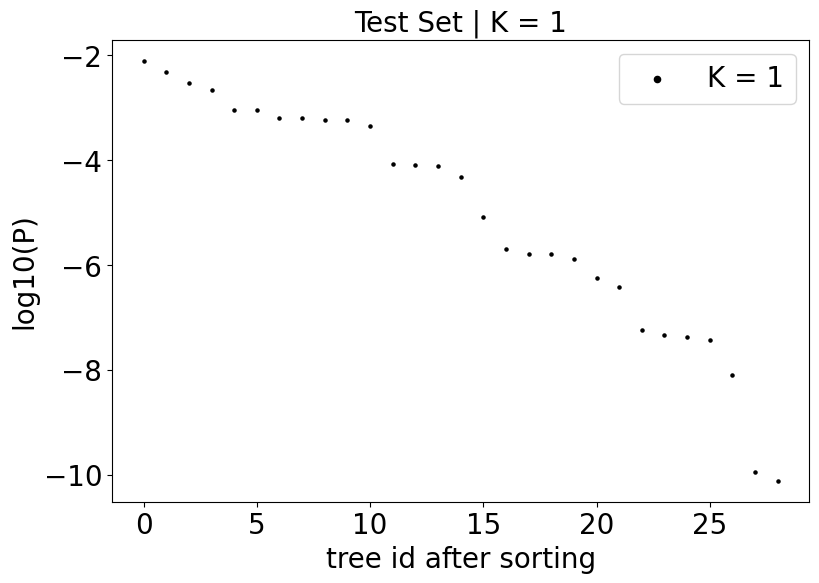

In [117]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 1", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

# APPROACH 1

## Load probabilities

### K = 2

In [70]:
# load the numpy array containing probabilities for each cluster
prob_first_k_2_cluster_1 = np.load(os.path.join(folder_first_k_2, "cluster_1", "training_results", "cluster_0_prob.npy"), allow_pickle=True)
prob_first_k_2_cluster_2 = np.load(os.path.join(folder_first_k_2, "cluster_2", "training_results", "cluster_1_prob.npy"), allow_pickle=True)

# extract only probabilities on the test set
prob_first_k_2_cluster_1_test = prob_first_k_2_cluster_1[-n_trees_test:]
prob_first_k_2_cluster_2_test = prob_first_k_2_cluster_2[-n_trees_test:]

### K = 3

In [71]:
# load the numpy array containing probabilities for each cluster
prob_first_k_3_cluster_1 = np.load(os.path.join(folder_first_k_3, "cluster_1", "training_results", "cluster_0_prob.npy"), allow_pickle=True)
prob_first_k_3_cluster_2 = np.load(os.path.join(folder_first_k_3, "cluster_2", "training_results", "cluster_1_prob.npy"), allow_pickle=True)
prob_first_k_3_cluster_3 = np.load(os.path.join(folder_first_k_3, "cluster_3", "training_results", "cluster_2_prob.npy"), allow_pickle=True)

# extract only probabilities on the test set
prob_first_k_3_cluster_1_test = prob_first_k_3_cluster_1[-n_trees_test:]
prob_first_k_3_cluster_2_test = prob_first_k_3_cluster_2[-n_trees_test:]
prob_first_k_3_cluster_3_test = prob_first_k_3_cluster_3[-n_trees_test:]

### K = 4

In [72]:
# load the numpy array containing probabilities for each cluster
prob_first_k_4_cluster_1 = np.load(os.path.join(folder_first_k_4, "cluster_1", "training_results", "cluster_0_prob.npy"), allow_pickle=True)
prob_first_k_4_cluster_2 = np.load(os.path.join(folder_first_k_4, "cluster_2", "training_results", "cluster_1_prob.npy"), allow_pickle=True)
prob_first_k_4_cluster_3 = np.load(os.path.join(folder_first_k_4, "cluster_3", "training_results", "cluster_2_prob.npy"), allow_pickle=True)
prob_first_k_4_cluster_4 = np.load(os.path.join(folder_first_k_4, "cluster_4", "training_results", "cluster_3_prob.npy"), allow_pickle=True)

# extract only probabilities on the test set
prob_first_k_4_cluster_1_test = prob_first_k_4_cluster_1[-n_trees_test:]
prob_first_k_4_cluster_2_test = prob_first_k_4_cluster_2[-n_trees_test:]
prob_first_k_4_cluster_3_test = prob_first_k_4_cluster_3[-n_trees_test:]
prob_first_k_4_cluster_4_test = prob_first_k_4_cluster_4[-n_trees_test:]

## Combine probabilities

### K = 2

In [73]:
# clustering with K = 2
prob_first_k_2 = combine_outputs([prob_first_k_2_cluster_1_test, prob_first_k_2_cluster_2_test])

### K = 3

In [74]:
# clustering with K = 3
prob_first_k_3 = combine_outputs([prob_first_k_3_cluster_1_test, prob_first_k_3_cluster_2_test, prob_first_k_3_cluster_3_test])

### K = 4

In [75]:
# clustering with K = 4
prob_first_k_4 = combine_outputs([prob_first_k_4_cluster_1_test, prob_first_k_4_cluster_2_test, prob_first_k_4_cluster_3_test, prob_first_k_4_cluster_4_test])

## Some statistics

### Sort the probabilities

In [76]:
# sort the probabilities for all values of K
sorted_prob_2_first = np.sort(prob_first_k_2)[::-1]
sorted_prob_3_first = np.sort(prob_first_k_3)[::-1]
sorted_prob_4_first = np.sort(prob_first_k_4)[::-1]

### Mean

In [77]:
# print the mean probability in the test set from each clustering
print("Mean probability with K = 2: " + str(np.mean(prob_first_k_2)))
print("Mean probability with K = 3: " + str(np.mean(prob_first_k_3)))
print("Mean probability with K = 4: " + str(np.mean(prob_first_k_4)))

Mean probability with K = 2: 0.0014504870581280103
Mean probability with K = 3: 0.0026918337710108054
Mean probability with K = 4: 0.004409367389911462


### Median

In [78]:
# print the median probability in the test set from each clustering
print("Median probability with K = 2: " + str(np.median(prob_first_k_2)))
print("Median probability with K = 3: " + str(np.median(prob_first_k_3)))
print("Median probability with K = 4: " + str(np.median(prob_first_k_4)))

Median probability with K = 2: 5.504498316797484e-05
Median probability with K = 3: 8.684349388375444e-05
Median probability with K = 4: 9.021681201006814e-05


## Plots

### Compare all

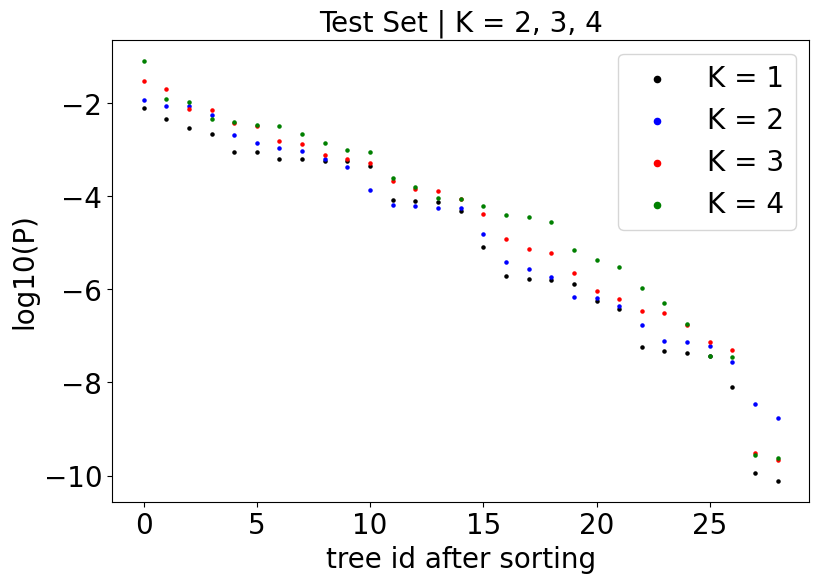

In [115]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 2, 3, 4", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_2_first), label='K = 2', marker='o', color='blue', s=5)
ax.scatter(x, np.log10(sorted_prob_3_first), label='K = 3', marker='o', color='red', s=5)
ax.scatter(x, np.log10(sorted_prob_4_first), label='K = 4', marker='o', color='green', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

### Comparison with single cluster

#### K = 2

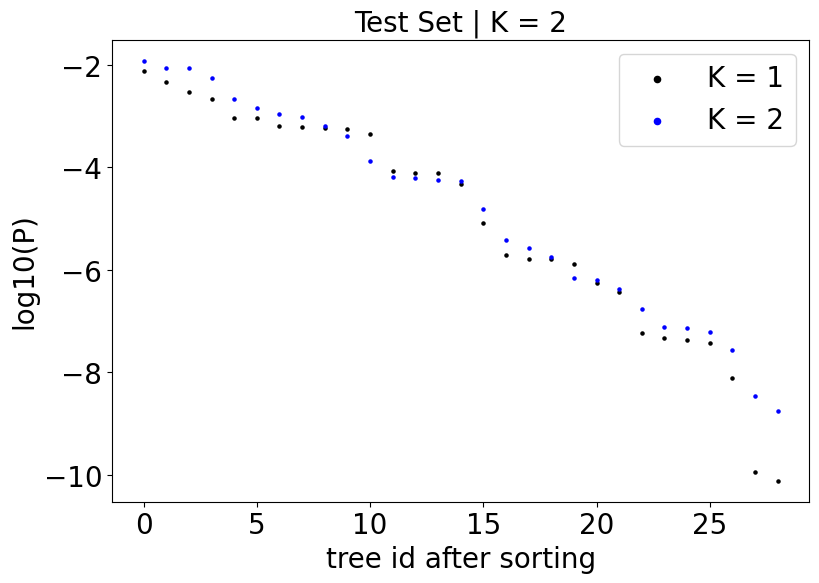

In [118]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 2", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_2_first), label='K = 2', marker='o', color='blue', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

#### K = 3

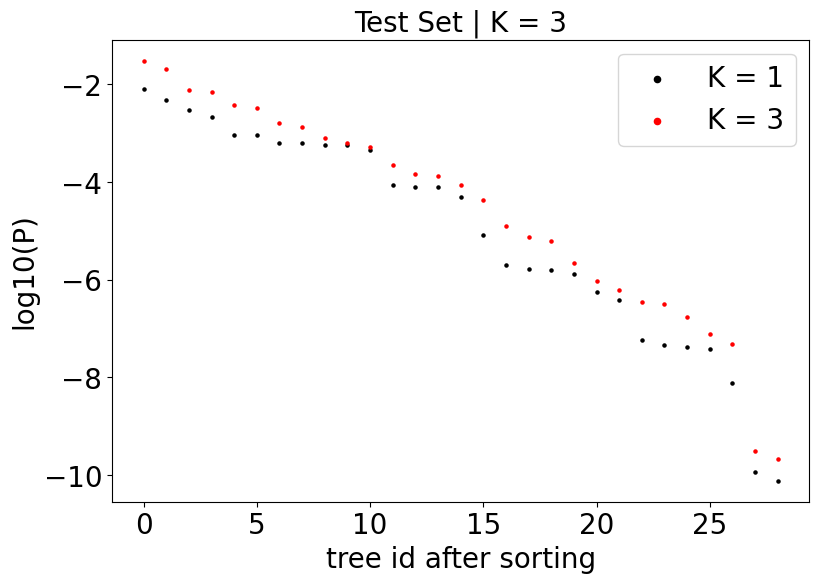

In [119]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 3", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_3_first), label='K = 3', marker='o', color='red', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

#### K = 4

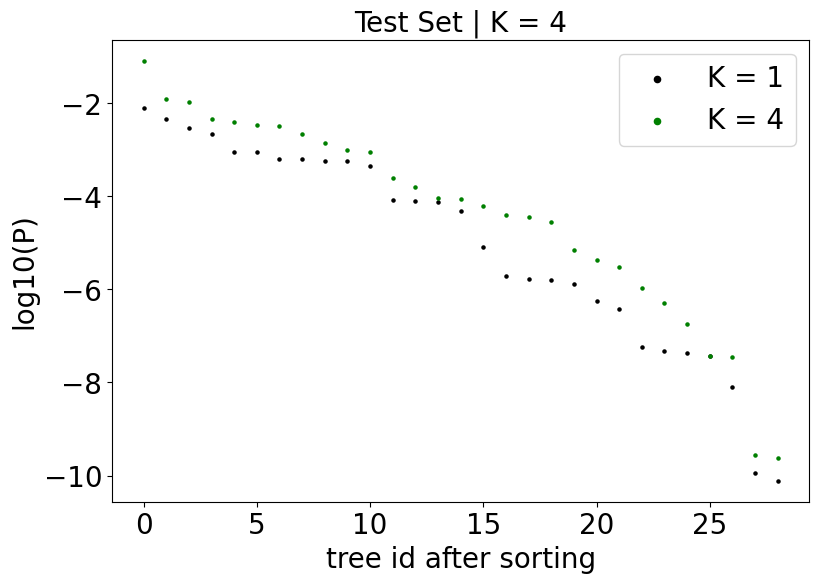

In [120]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 4", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_4_first), label='K = 4', marker='o', color='green', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

# APPROACH 2

## Load probabilities

### K = 2

In [83]:
# load the numpy array containing probabilities for each cluster
prob_second_k_2_cluster_1 = np.load(os.path.join(folder_second_k_2, "cluster_1", "training_results", "cluster_0_prob.npy"), allow_pickle=True)
prob_second_k_2_cluster_2 = np.load(os.path.join(folder_second_k_2, "cluster_2", "training_results", "cluster_1_prob.npy"), allow_pickle=True)

# extract only probabilities on the test set
prob_second_k_2_cluster_1_test = prob_second_k_2_cluster_1[-n_trees_test:]
prob_second_k_2_cluster_2_test = prob_second_k_2_cluster_2[-n_trees_test:]

### K = 3

In [84]:
# load the numpy array containing probabilities for each cluster
prob_second_k_3_cluster_1 = np.load(os.path.join(folder_second_k_3, "cluster_1", "training_results", "cluster_0_prob.npy"), allow_pickle=True)
prob_second_k_3_cluster_2 = np.load(os.path.join(folder_second_k_3, "cluster_2", "training_results", "cluster_1_prob.npy"), allow_pickle=True)
prob_second_k_3_cluster_3 = np.load(os.path.join(folder_second_k_3, "cluster_3", "training_results", "cluster_2_prob.npy"), allow_pickle=True)

# extract only probabilities on the test set
prob_second_k_3_cluster_1_test = prob_second_k_3_cluster_1[-n_trees_test:]
prob_second_k_3_cluster_2_test = prob_second_k_3_cluster_2[-n_trees_test:]
prob_second_k_3_cluster_3_test = prob_second_k_3_cluster_3[-n_trees_test:]

### K = 4

In [85]:
# load the numpy array containing probabilities for each cluster
prob_second_k_4_cluster_1 = np.load(os.path.join(folder_second_k_4, "cluster_1", "training_results", "cluster_0_prob.npy"), allow_pickle=True)
prob_second_k_4_cluster_2 = np.load(os.path.join(folder_second_k_4, "cluster_2", "training_results", "cluster_1_prob.npy"), allow_pickle=True)
prob_second_k_4_cluster_3 = np.load(os.path.join(folder_second_k_4, "cluster_3", "training_results", "cluster_2_prob.npy"), allow_pickle=True)
prob_second_k_4_cluster_4 = np.load(os.path.join(folder_second_k_4, "cluster_4", "training_results", "cluster_3_prob.npy"), allow_pickle=True)

# extract only probabilities on the test set
prob_second_k_4_cluster_1_test = prob_second_k_4_cluster_1[-n_trees_test:]
prob_second_k_4_cluster_2_test = prob_second_k_4_cluster_2[-n_trees_test:]
prob_second_k_4_cluster_3_test = prob_second_k_4_cluster_3[-n_trees_test:]
prob_second_k_4_cluster_4_test = prob_second_k_4_cluster_4[-n_trees_test:]

## Combine probabilities

### K = 2

In [86]:
# clustering with K = 2
prob_second_k_2 = combine_outputs([prob_second_k_2_cluster_1_test, prob_second_k_2_cluster_2_test])

### K = 3

In [87]:
# clustering with K = 3
prob_second_k_3 = combine_outputs([prob_second_k_3_cluster_1_test, prob_second_k_3_cluster_2_test, prob_second_k_3_cluster_3_test])

### K = 4

In [88]:
# clustering with K = 4
prob_second_k_4 = combine_outputs([prob_second_k_4_cluster_1_test, prob_second_k_4_cluster_2_test, prob_second_k_4_cluster_3_test, prob_second_k_4_cluster_4_test])

## Some statistics

### Sort the probabilities

In [89]:
# sort the probabilities for all values of K
sorted_prob_2_second = np.sort(prob_second_k_2)[::-1]
sorted_prob_3_second = np.sort(prob_second_k_3)[::-1]
sorted_prob_4_second = np.sort(prob_second_k_4)[::-1]

### Mean

In [90]:
# print the mean probability in the test set from each clustering
print("Mean probability with K = 1: " + str(np.mean(prob_first_k_1)))
print("Mean probability with K = 2: " + str(np.mean(prob_second_k_2)))
print("Mean probability with K = 3: " + str(np.mean(prob_second_k_3)))
print("Mean probability with K = 4: " + str(np.mean(prob_second_k_4)))

Mean probability with K = 1: 0.0007791163624282327
Mean probability with K = 2: 0.0012099807020533391
Mean probability with K = 3: 0.0012955192715669887
Mean probability with K = 4: 0.002068855388937421


### Median

In [91]:
# print the median probability in the test set from each clustering
print("Median probability with K = 1: " + str(np.median(prob_first_k_1)))
print("Median probability with K = 2: " + str(np.median(prob_second_k_2)))
print("Median probability with K = 3: " + str(np.median(prob_second_k_3)))
print("Median probability with K = 4: " + str(np.median(prob_second_k_4)))

Median probability with K = 1: 4.8135103485112765e-05
Median probability with K = 2: 8.071270261701167e-05
Median probability with K = 3: 4.219637178069389e-05
Median probability with K = 4: 4.613460931386536e-05


## Plots

### Compare all

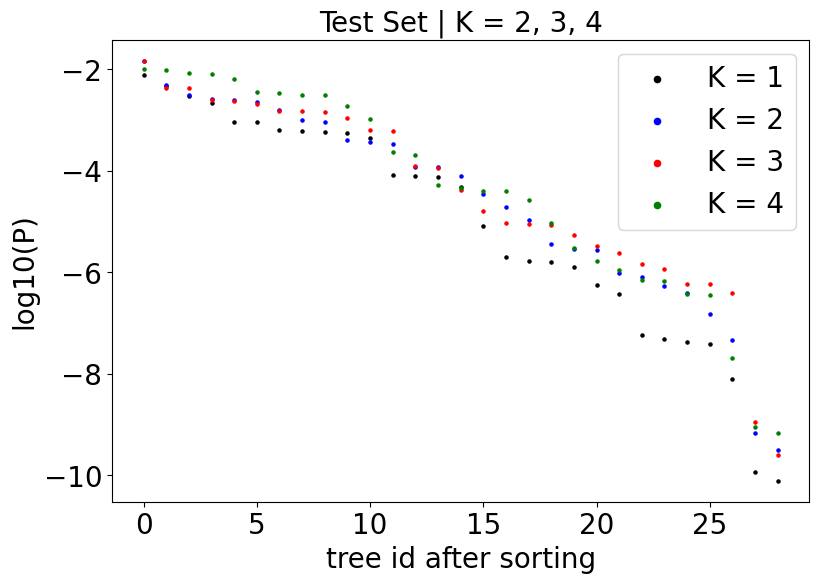

In [123]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 2, 3, 4", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_2_second), label='K = 2', marker='o', color='blue', s=5)
ax.scatter(x, np.log10(sorted_prob_3_second), label='K = 3', marker='o', color='red', s=5)
ax.scatter(x, np.log10(sorted_prob_4_second), label='K = 4', marker='o', color='green', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

### Comparison with single cluster

#### K = 2

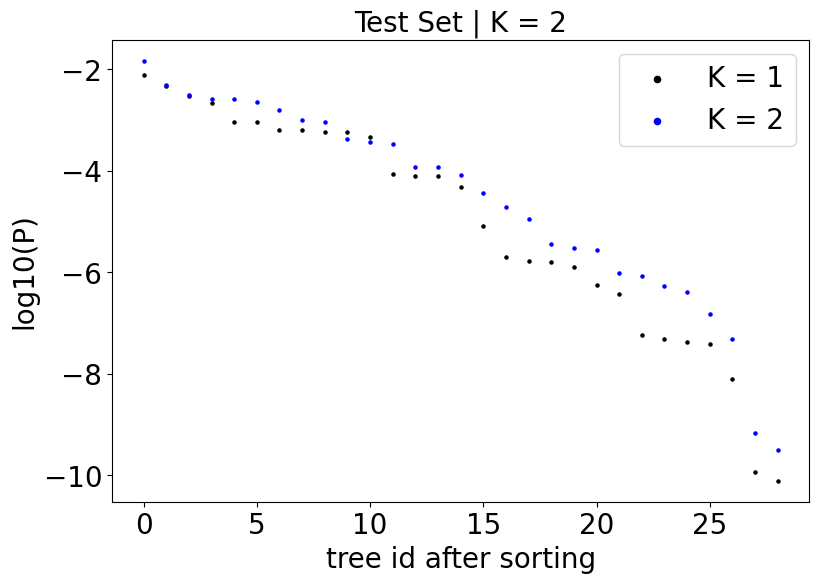

In [124]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 2", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_2_second), label='K = 2', marker='o', color='blue', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

#### K = 3

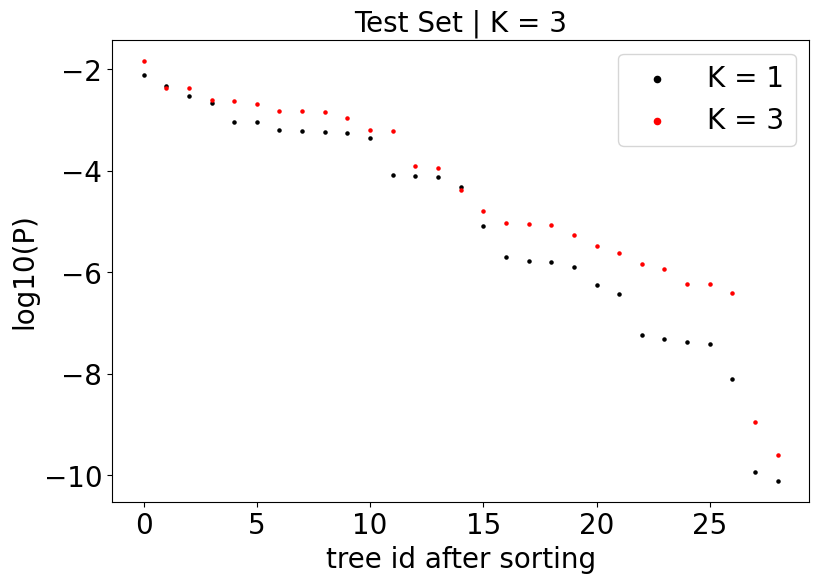

In [125]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 3", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_3_second), label='K = 3', marker='o', color='red', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

#### K = 4

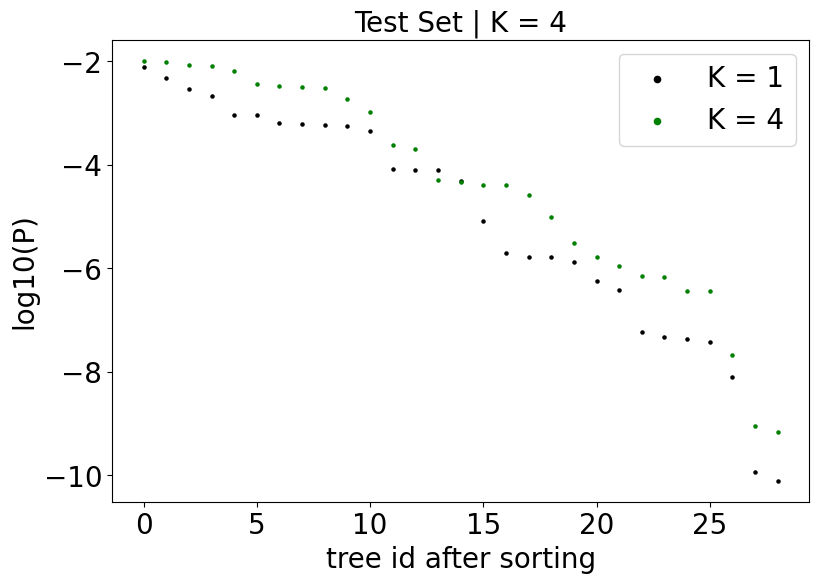

In [126]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 4", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_4_second), label='K = 4', marker='o', color='green', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

# APPROACH 3: RECAP

## Load probabilities

### K = 2

In [96]:
# load the numpy array containing probabilities for each cluster
prob_RECAP_k_2_cluster_1 = np.load(os.path.join(folder_RECAP_k_2, "cluster_1", "training_results", "cluster_0_prob.npy"), allow_pickle=True)
prob_RECAP_k_2_cluster_2 = np.load(os.path.join(folder_RECAP_k_2, "cluster_2", "training_results", "cluster_1_prob.npy"), allow_pickle=True)

# extract only probabilities on the test set
prob_RECAP_k_2_cluster_1_test = prob_RECAP_k_2_cluster_1[-n_trees_test:]
prob_RECAP_k_2_cluster_2_test = prob_RECAP_k_2_cluster_2[-n_trees_test:]

### K = 3

In [97]:
# load the numpy array containing probabilities for each cluster
prob_RECAP_k_3_cluster_1 = np.load(os.path.join(folder_RECAP_k_3, "cluster_1", "training_results", "cluster_0_prob.npy"), allow_pickle=True)
prob_RECAP_k_3_cluster_2 = np.load(os.path.join(folder_RECAP_k_3, "cluster_2", "training_results", "cluster_1_prob.npy"), allow_pickle=True)
prob_RECAP_k_3_cluster_3 = np.load(os.path.join(folder_RECAP_k_3, "cluster_3", "training_results", "cluster_2_prob.npy"), allow_pickle=True)

# extract only probabilities on the test set
prob_RECAP_k_3_cluster_1_test = prob_RECAP_k_3_cluster_1[-n_trees_test:]
prob_RECAP_k_3_cluster_2_test = prob_RECAP_k_3_cluster_2[-n_trees_test:]
prob_RECAP_k_3_cluster_3_test = prob_RECAP_k_3_cluster_3[-n_trees_test:]

### K = 4

In [98]:
# load the numpy array containing probabilities for each cluster
prob_RECAP_k_4_cluster_1 = np.load(os.path.join(folder_RECAP_k_4, "cluster_1", "training_results", "cluster_0_prob.npy"), allow_pickle=True)
prob_RECAP_k_4_cluster_2 = np.load(os.path.join(folder_RECAP_k_4, "cluster_2", "training_results", "cluster_1_prob.npy"), allow_pickle=True)
prob_RECAP_k_4_cluster_3 = np.load(os.path.join(folder_RECAP_k_4, "cluster_3", "training_results", "cluster_2_prob.npy"), allow_pickle=True)
prob_RECAP_k_4_cluster_4 = np.load(os.path.join(folder_RECAP_k_4, "cluster_4", "training_results", "cluster_3_prob.npy"), allow_pickle=True)

# extract only probabilities on the test set
prob_RECAP_k_4_cluster_1_test = prob_RECAP_k_4_cluster_1[-n_trees_test:]
prob_RECAP_k_4_cluster_2_test = prob_RECAP_k_4_cluster_2[-n_trees_test:]
prob_RECAP_k_4_cluster_3_test = prob_RECAP_k_4_cluster_3[-n_trees_test:]
prob_RECAP_k_4_cluster_4_test = prob_RECAP_k_4_cluster_4[-n_trees_test:]

## Combine probabilities

### K = 2

In [99]:
# clustering with K = 2
prob_RECAP_k_2 = combine_outputs([prob_RECAP_k_2_cluster_1_test, prob_RECAP_k_2_cluster_2_test])

### K = 3

In [100]:
# clustering with K = 3
prob_RECAP_k_3 = combine_outputs([prob_RECAP_k_3_cluster_1_test, prob_RECAP_k_3_cluster_2_test, prob_RECAP_k_3_cluster_3_test])

### K = 4

In [101]:
# clustering with K = 4
prob_RECAP_k_4 = combine_outputs([prob_RECAP_k_4_cluster_1_test, prob_RECAP_k_4_cluster_2_test, prob_RECAP_k_4_cluster_3_test, prob_RECAP_k_4_cluster_4_test])

## Some statistics

### Sort the probabilities

In [102]:
# sort the probabilities for all values of K
sorted_prob_2_RECAP = np.sort(prob_RECAP_k_2)[::-1]
sorted_prob_3_RECAP = np.sort(prob_RECAP_k_3)[::-1]
sorted_prob_4_RECAP = np.sort(prob_RECAP_k_4)[::-1]

### Mean

In [103]:
# print the mean probability in the test set from each clustering
print("Mean probability with K = 1: " + str(np.mean(prob_first_k_1)))
print("Mean probability with K = 2: " + str(np.mean(prob_RECAP_k_2)))
print("Mean probability with K = 3: " + str(np.mean(prob_RECAP_k_3)))
print("Mean probability with K = 4: " + str(np.mean(prob_RECAP_k_4)))

Mean probability with K = 1: 0.0007791163624282327
Mean probability with K = 2: 0.00046373086936142143
Mean probability with K = 3: 0.0032308853758020173
Mean probability with K = 4: 0.0030107376015924827


### Median

In [104]:
# print the median probability in the test set from each clustering
print("Median probability with K = 1: " + str(np.median(prob_first_k_1)))
print("Median probability with K = 2: " + str(np.median(prob_RECAP_k_2)))
print("Median probability with K = 3: " + str(np.median(prob_RECAP_k_3)))
print("Median probability with K = 4: " + str(np.median(prob_RECAP_k_4)))

Median probability with K = 1: 4.8135103485112765e-05
Median probability with K = 2: 3.193355972481828e-05
Median probability with K = 3: 4.219387820444763e-05
Median probability with K = 4: 0.0003487815045087222


## Plots

### Compare all

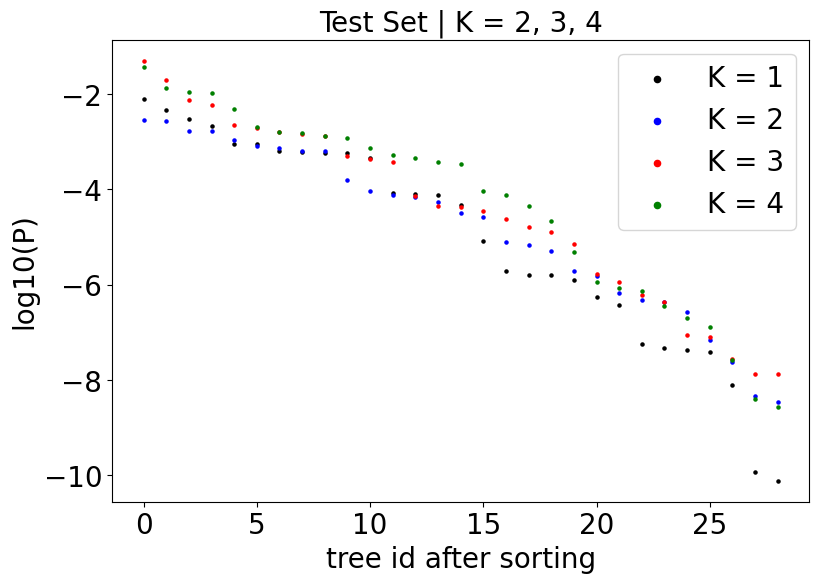

In [127]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 2, 3, 4", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_2_RECAP), label='K = 2', marker='o', color='blue', s=5)
ax.scatter(x, np.log10(sorted_prob_3_RECAP), label='K = 3', marker='o', color='red', s=5)
ax.scatter(x, np.log10(sorted_prob_4_RECAP), label='K = 4', marker='o', color='green', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

### Comparison with single cluster

#### K = 2

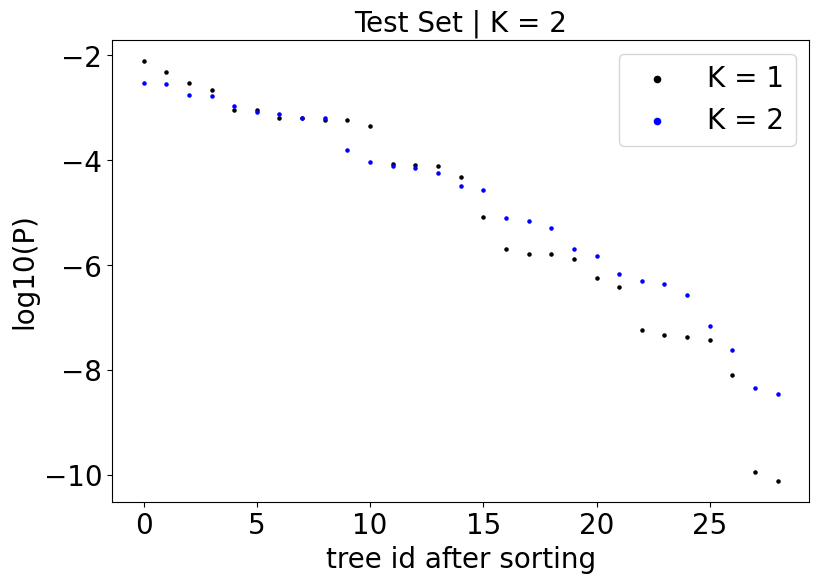

In [128]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 2", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_2_RECAP), label='K = 2', marker='o', color='blue', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

#### K = 3

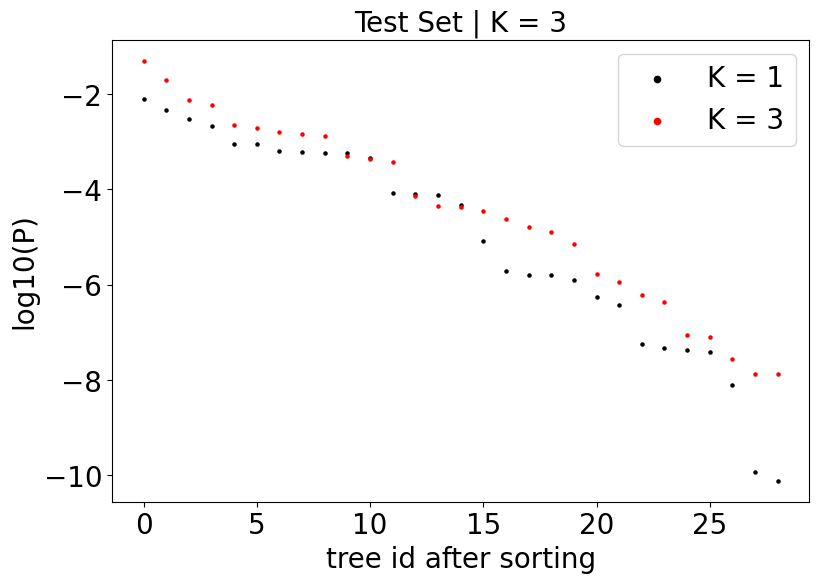

In [129]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 3", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_3_RECAP), label='K = 3', marker='o', color='red', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

#### K = 4

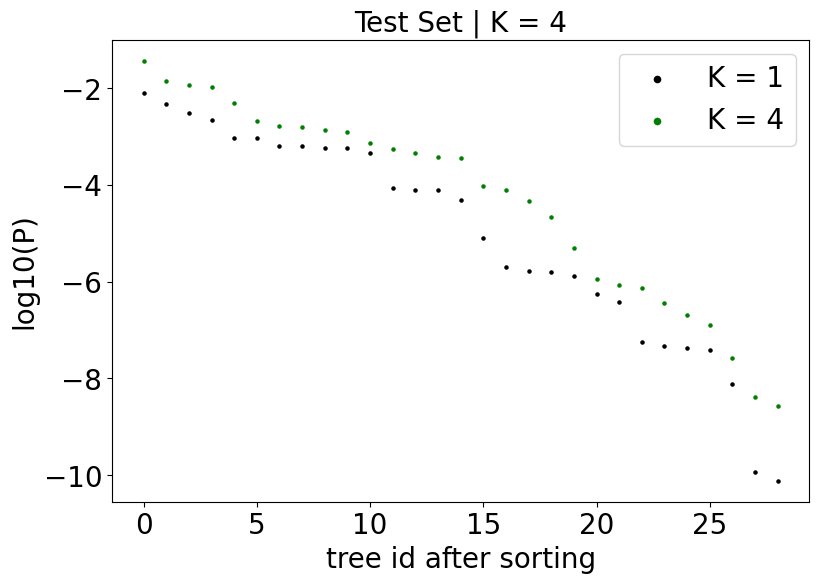

In [130]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 4", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='K = 1', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_4_RECAP), label='K = 4', marker='o', color='green', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

# COMPARE ALL APPROACHES

## K = 2

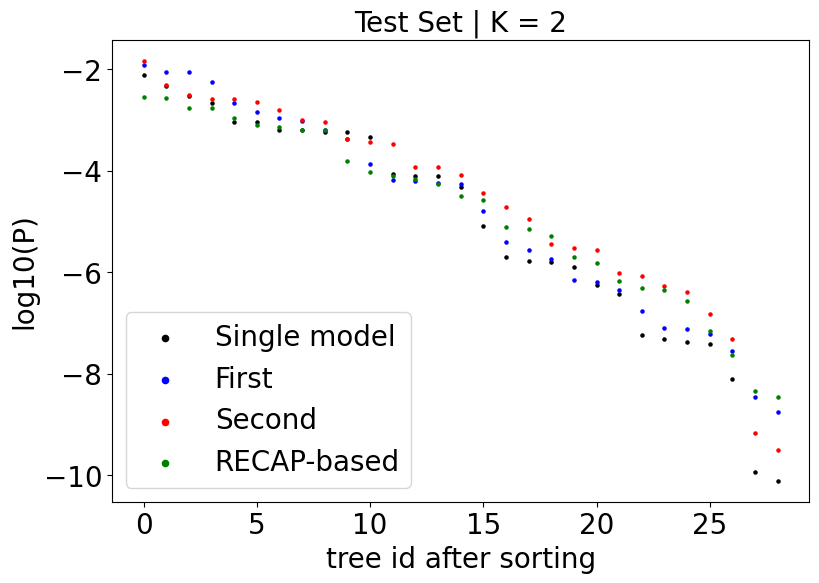

In [132]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 2", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='Single model', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_2_first), label='First', marker='o', color='blue', s=5)
ax.scatter(x, np.log10(sorted_prob_2_second), label='Second', marker='o', color='red', s=5)
ax.scatter(x, np.log10(sorted_prob_2_RECAP), label='RECAP-based', marker='o', color='green', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

## K = 3

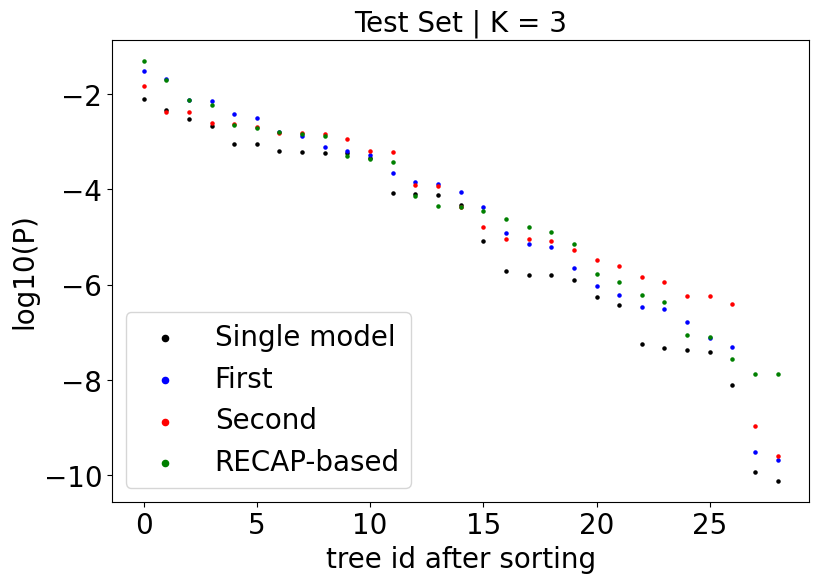

In [133]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 3", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='Single model', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_3_first), label='First', marker='o', color='blue', s=5)
ax.scatter(x, np.log10(sorted_prob_3_second), label='Second', marker='o', color='red', s=5)
ax.scatter(x, np.log10(sorted_prob_3_RECAP), label='RECAP-based', marker='o', color='green', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()

## K = 4

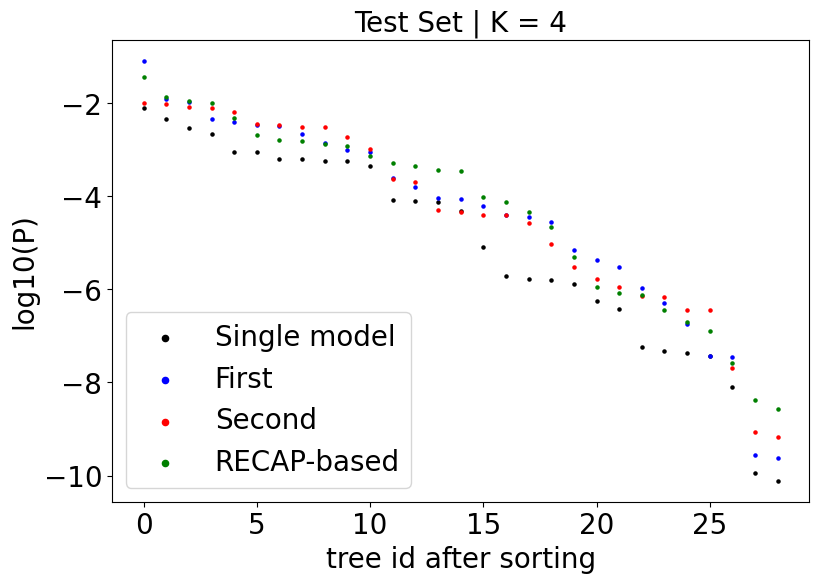

In [134]:
# plot the probabilities
figure, ax = plt.subplots(figsize=(9, 6))

ax.set_title("Test Set | K = 4", fontsize=20)
ax.set_xlabel("tree id after sorting", fontsize=20)
ax.set_ylabel("log10(P)", fontsize=20)

x = [i for i in range(len(sorted_prob_1_first))]

ax.scatter(x, np.log10(sorted_prob_1_first), label='Single model', marker='o', color='black', s=5)
ax.scatter(x, np.log10(sorted_prob_4_first), label='First', marker='o', color='blue', s=5)
ax.scatter(x, np.log10(sorted_prob_4_second), label='Second', marker='o', color='red', s=5)
ax.scatter(x, np.log10(sorted_prob_4_RECAP), label='RECAP-based', marker='o', color='green', s=5)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20, markerscale=2)
plt.show()